In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"C:\Users\Nikhi\Churn-Prediction(SQL-BI-PY-ML)\Prediction_Data.xlsx"
sheet_name = 'vw_ChurnData'

df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed,Others,Others
1,11873-HAR,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed,Others,Others
2,11878-RAJ,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned,Competitor,Competitor offered more data
3,11882-BIH,Female,74,No,Bihar,14,15,Deal 5,Yes,No,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned,Attitude,Attitude of support person
4,11887-MAD,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed,Others,Others


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [7]:
df.isnull().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3297
Phone_Service                     0
Multiple_Lines                    0
Internet_Service                  0
Internet_Type                  1223
Online_Security                   0
Online_Backup                     0
Device_Protection_Plan            0
Premium_Support                   0
Streaming_TV                      0
Streaming_Movies                  0
Streaming_Music                   0
Unlimited_Data                    0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

In [19]:
df[df['Value_Deal'].isnull()==True]

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed,Others,Others
2,11878-RAJ,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned,Competitor,Competitor offered more data
6,11906-MAD,Female,53,No,Madhya Pradesh,2,29,NaN,Yes,No,...,Bank Withdrawal,79.300003,523.150024,0.0,10,134.470001,667.619995,Churned,Competitor,Competitor had better devices
9,11922-PUN,Female,48,Yes,Punjab,5,2,NaN,Yes,Yes,...,Credit Card,105.000000,7589.799805,0.0,0,473.760010,8063.560059,Stayed,Others,Others
10,11925-MAH,Female,78,Yes,Maharashtra,12,12,NaN,Yes,Yes,...,Bank Withdrawal,25.200001,1306.300049,0.0,0,1571.500000,2877.800049,Stayed,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,99884-WES,Female,46,Yes,West Bengal,11,20,NaN,Yes,No,...,Credit Card,19.350000,1031.699951,0.0,0,513.239990,1544.939941,Stayed,Others,Others
6001,99897-TAM,Male,63,Yes,Tamil Nadu,9,30,NaN,Yes,No,...,Bank Withdrawal,80.599998,2244.949951,0.0,0,947.520020,3192.469971,Stayed,Others,Others
6002,99898-MAH,Female,39,No,Maharashtra,2,14,NaN,Yes,Yes,...,Bank Withdrawal,65.199997,3687.850098,0.0,0,87.779999,3775.629883,Stayed,Others,Others
6004,99942-KER,Male,59,Yes,Kerala,8,18,NaN,Yes,No,...,Bank Withdrawal,69.699997,69.699997,0.0,0,21.520000,91.220001,Churned,Attitude,Attitude of service provider


In [35]:
df['Value_Deal'].value_counts()

Value_Deal
Deal 2    758
Deal 5    578
Deal 4    540
Deal 1    469
Deal 3    365
Name: count, dtype: int64

In [39]:
df['Value_Deal'].fillna("No Deal", inplace=True)

In [27]:
df['Internet_Type'][df['Internet_Type'].isnull()==True]

10      NaN
24      NaN
29      NaN
31      NaN
32      NaN
       ... 
5988    NaN
5990    NaN
5996    NaN
5998    NaN
6003    NaN
Name: Internet_Type, Length: 1223, dtype: object

In [31]:
df['Internet_Type'].mode()

0    Fiber Optic
Name: Internet_Type, dtype: object

In [37]:
df['Internet_Type'].value_counts()

Internet_Type
Fiber Optic    2675
DSL            1398
Cable           711
Name: count, dtype: int64

In [41]:
df['Internet_Type'].fillna(df['Internet_Type'].mode()[0], inplace=True)

<Axes: xlabel='Internet_Type', ylabel='Count'>

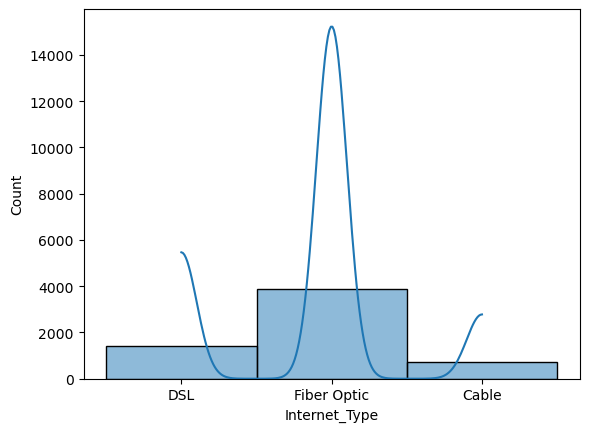

In [102]:
sns.histplot(df['Internet_Type'], kde=True)

In [43]:
df.isnull().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

In [47]:
df.Customer_Status.value_counts(normalize=True)

Customer_Status
Stayed     0.71167
Churned    0.28833
Name: proportion, dtype: float64

In [51]:
df['Customer_Status'] = np.where(df.Customer_Status=='Churned',1,0)

<Axes: ylabel='Customer_Status'>

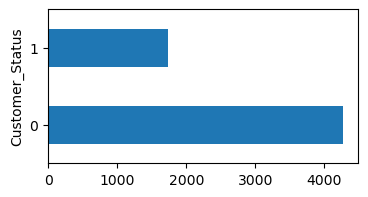

In [65]:
df.Customer_Status.value_counts().plot(kind='barh',figsize=(4,2))

as we can see our data is imbalanced, we'll look out for solution to overcome as this could lead to make biasness in our model

In [67]:
df.drop(columns=['Customer_ID','Churn_Category','Churn_Reason'],axis=1,inplace=True)

## creating age and tenure bins

In [96]:
print("Age")
print(df.Age.min(),df.Age.max())

print("Tenure")
print(df.Tenure_in_Months.min(),df.Tenure_in_Months.max())

Age
18 84


Tenure
1 36


In [104]:
def binning_age(age):
    if age>=18 and age<31:
        return '18-30'
    elif age>=31 and age<51:
        return '31-50'
    elif age>=51 and age<71:
        return '51-70'
    else:
        return '70+'


df['Age_group'] = df['Age'].apply(binning_age)

In [110]:
labels = ['{0}-{1}'.format(i,i+11) for i in range(1,36,12)]
df['Tenure_group'] = pd.cut(df.Tenure_in_Months,range(1,40,12),labels=labels)

why are we binning these columns:
1. Reduces Noise and Outliers
2. Simplifies Relationships
3. Prevents Overfitting
4. Also helps if we dummify columns

In [112]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Age_group,Tenure_group
0,Male,74,Yes,Maharashtra,5,6,No Deal,Yes,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,0,70+,1-12
1,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,Yes,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,0,31-50,1-12
2,Male,75,Yes,Rajasthan,15,17,No Deal,Yes,No,Yes,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,1,70+,13-24
3,Female,74,No,Bihar,14,15,Deal 5,Yes,No,Yes,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,1,70+,13-24
4,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,Yes,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,0,31-50,25-36


In [114]:
df1 = df.copy()
df1.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Age_group,Tenure_group
0,Male,74,Yes,Maharashtra,5,6,No Deal,Yes,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,0,70+,1-12
1,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,Yes,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,0,31-50,1-12
2,Male,75,Yes,Rajasthan,15,17,No Deal,Yes,No,Yes,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,1,70+,13-24
3,Female,74,No,Bihar,14,15,Deal 5,Yes,No,Yes,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,1,70+,13-24
4,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,Yes,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,0,31-50,25-36


In [116]:
df1.drop(columns=['Age','Tenure_in_Months'],axis=1,inplace=True)

In [118]:
df1.describe()

,Number_of_Referrals,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,7.439820,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020,0.288330
std,4.622369,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081,0.453023
min,0.000000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001,0.000000
25%,3.000000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998,0.000000
50%,7.000000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902,0.000000
75%,11.000000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059,1.000000
max,15.000000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844,1.000000


1. The minimum value of Monthly_Charge is -10.000000, which is unrealistic for a charge. This likely indicates incorrect or missing data.
2. The 25th, 50th, and 75th percentiles of Total_Refunds are 0.000000, suggesting most customers have not received refunds.
3. Columns like Total_Charges, Total_Extra_Data_Charges, Total_Long_Distance_Charges, and Total_Revenue have a large difference between their  mean and max values
4. The maximum value of Total_Extra_Data_Charges is 150.000000, while the 75th percentile is 0.000000. This indicates that very few customers incur extra data charges
5. The mean of Customer_Status is 0.288330, meaning around 28.8% of customers are active
6. The mean of Total_Revenue (3233.246020) is higher than Total_Charges (2430.986173), suggesting that additional charges like long-distance and extra data significantly contribute to revenue
7. The minimum values for Total_Charges, Total_Extra_Data_Charges, and Total_Long_Distance_Charges are 0.000000, indicating some customers may not be using certain services

In [122]:
num_col = df1.select_dtypes(include=['int64','float64'])
type(num_col)

pandas.core.frame.DataFrame

In [158]:
num_col.corr()

,Number_of_Referrals,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
Number_of_Referrals,1.000000,-0.013672,-0.003073,0.015018,-0.003919,0.009926,0.000454
Monthly_Charge,-0.013672,1.000000,0.619239,0.011646,0.117952,0.205873,0.554240
Total_Charges,-0.003073,0.619239,1.000000,0.023244,0.119024,0.585534,0.970130
Total_Refunds,0.015018,0.011646,0.023244,1.000000,0.019149,0.016602,0.020768
Total_Extra_Data_Charges,-0.003919,0.117952,0.119024,0.019149,1.000000,0.050786,0.118533
Total_Long_Distance_Charges,0.009926,0.205873,0.585534,0.016602,0.050786,1.000000,0.764554
Total_Revenue,0.000454,0.554240,0.970130,0.020768,0.118533,0.764554,1.000000


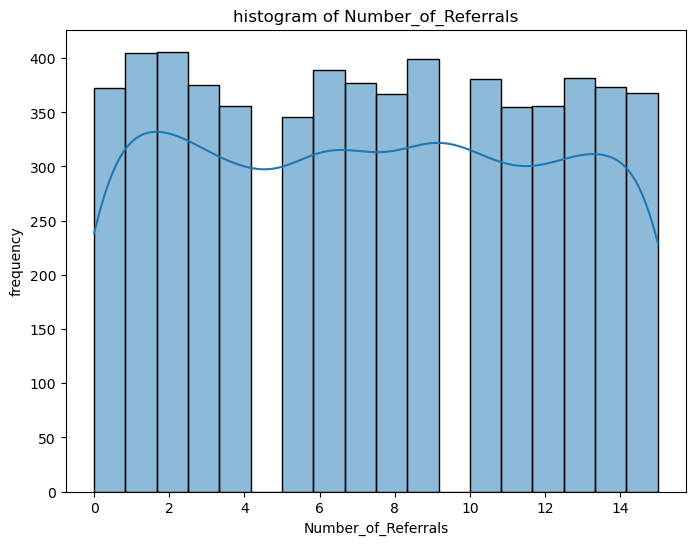

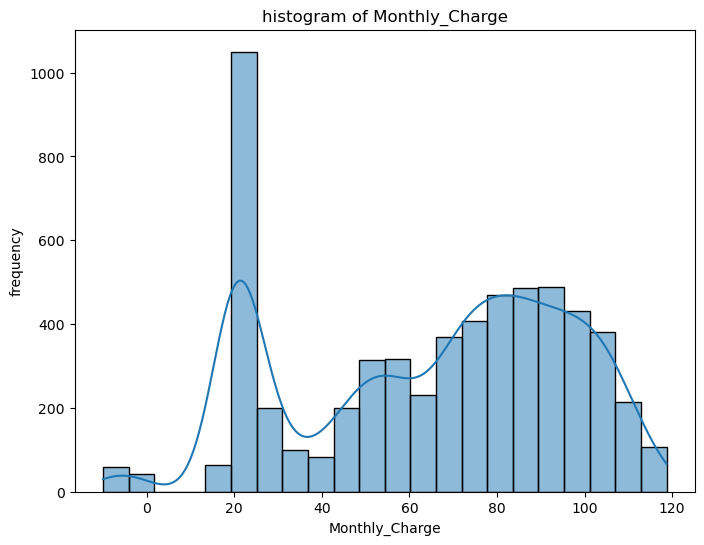

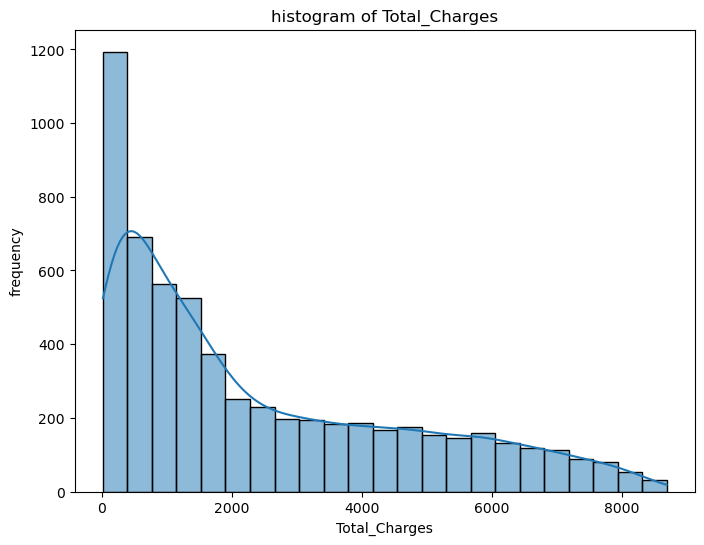

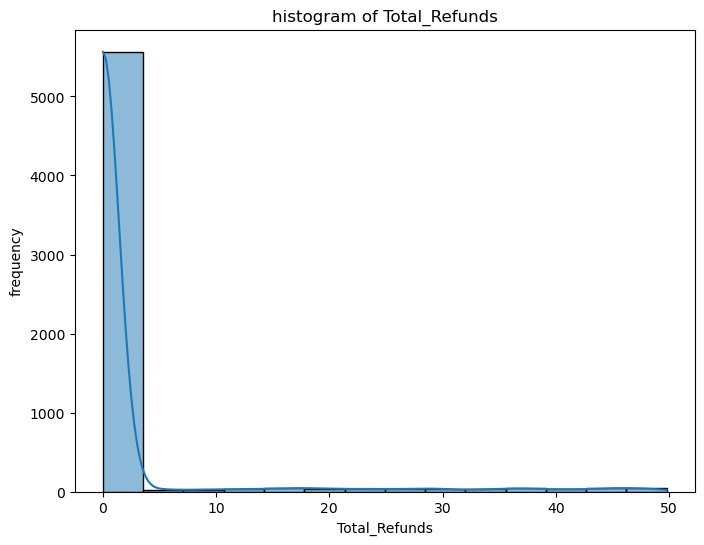

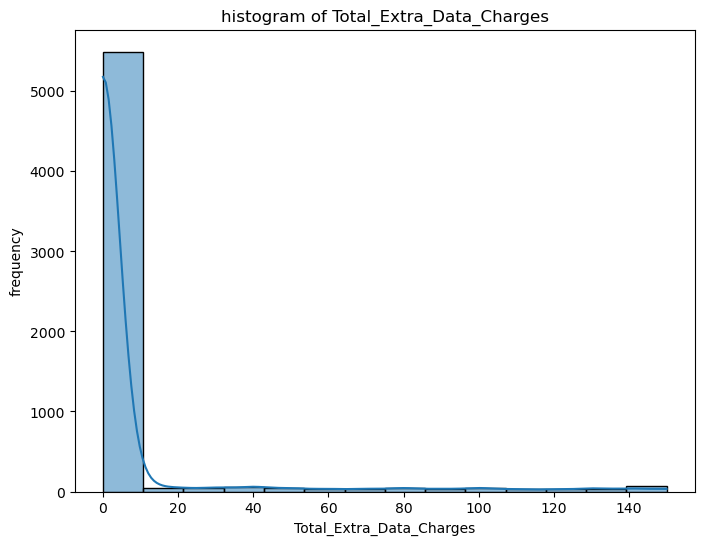

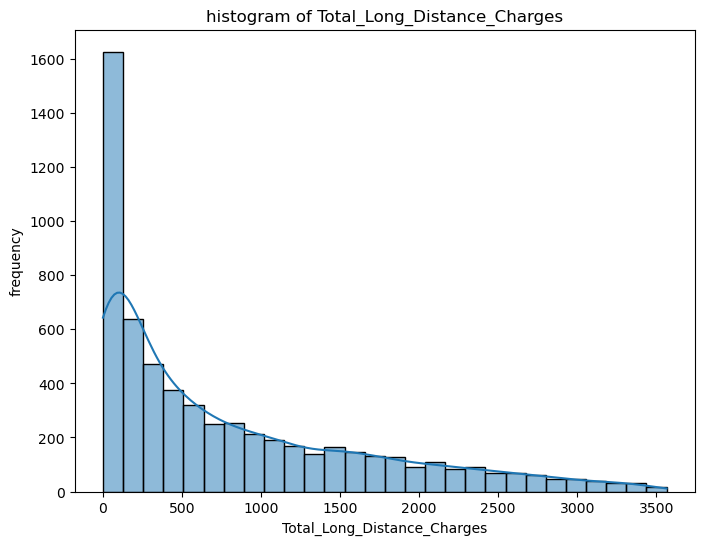

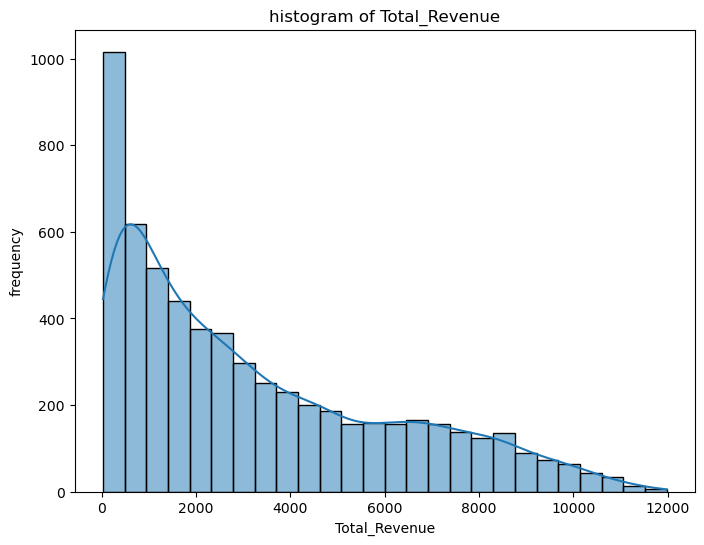

In [124]:
for cols in num_col.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(num_col[cols],kde=True)
    plt.title(f'histogram of {cols}')
    plt.xlabel(cols)
    plt.ylabel("frequency")
    plt.show()

Number_of_Referrals: The distribution is uniform, with no specific peak, suggesting referrals are evenly distributed.

Monthly_Charge: There is a notable spike near $20, possibly indicating a common lower-tier plan, followed by a spread across higher charges.

Total_Charges: The distribution is right-skewed, with most customers having lower total charges and fewer with very high amounts.

Total_Refunds: Highly skewed, with most customers having no refunds and a few with significant refunds.

Total_Extra_Data_Charges: Majority of customers have zero extra charges, with occasional high charges as outliers.

Total_Long_Distance_Charges: Right-skewed, with most customers incurring minimal charges and a few incurring very high charges.

Total_Revenue: Similar to Total_Charges, this is right-skewed, with most revenue coming from a smaller subset of customers.

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_10712\2268123961.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,4))


<Figure size 640x480 with 0 Axes>

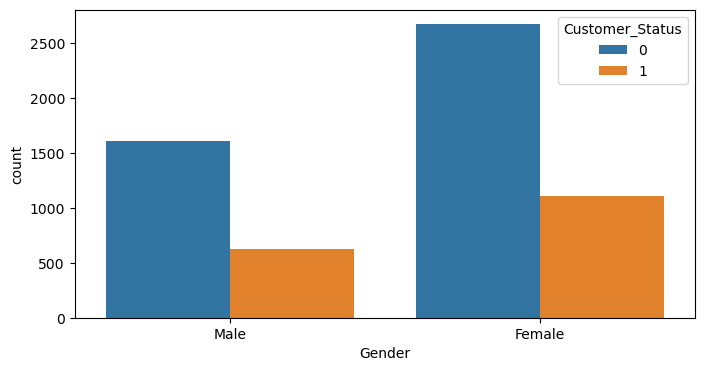

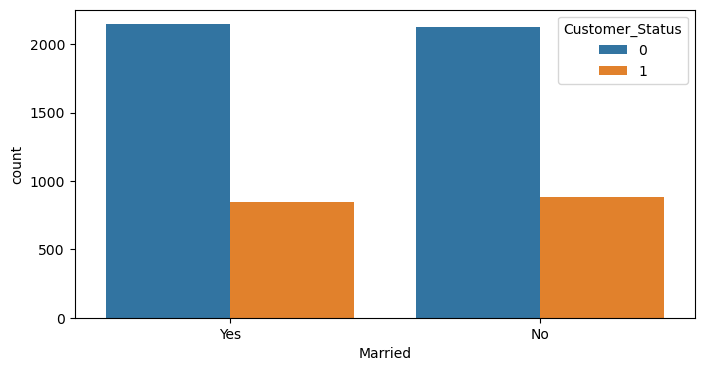

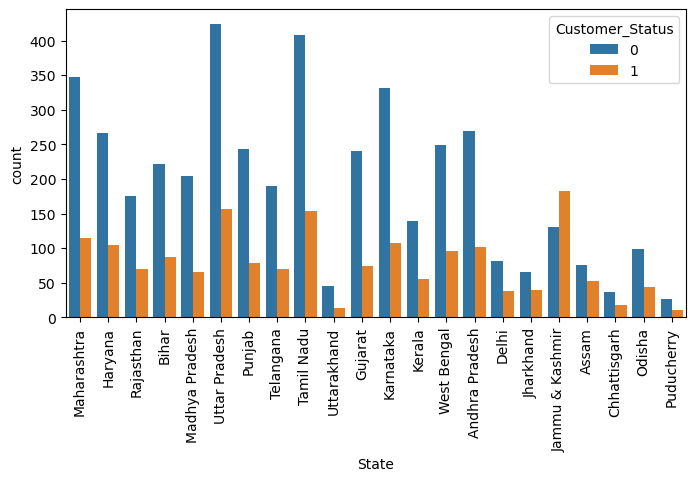

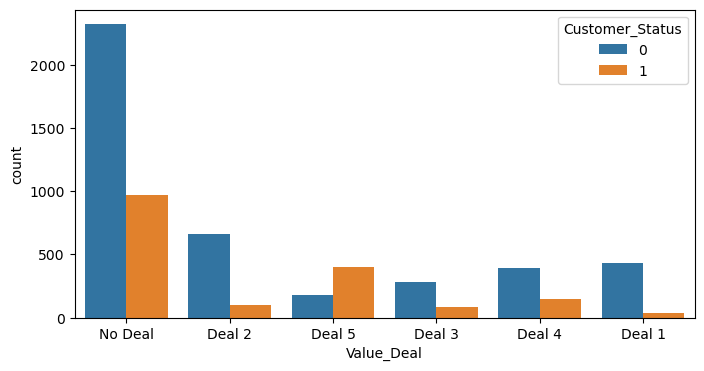

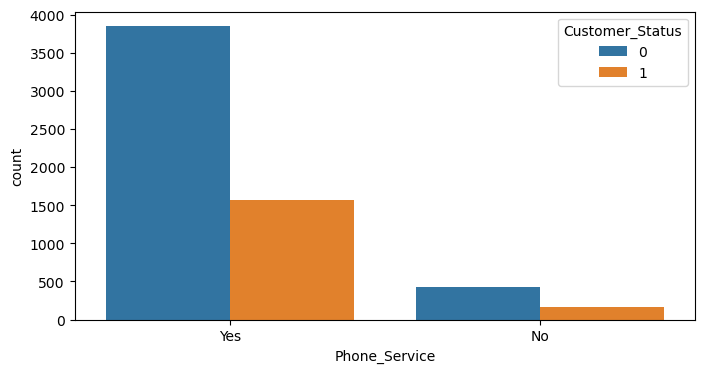

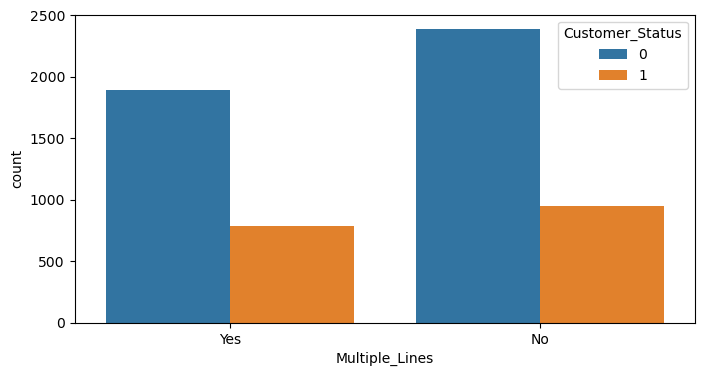

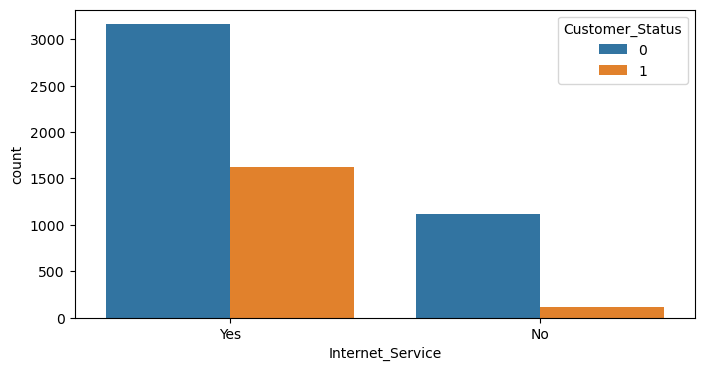

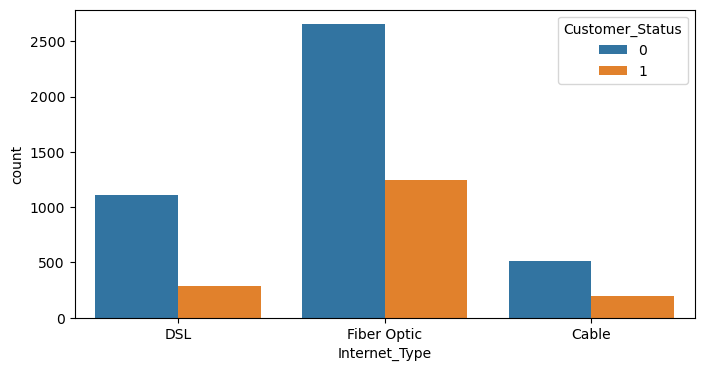

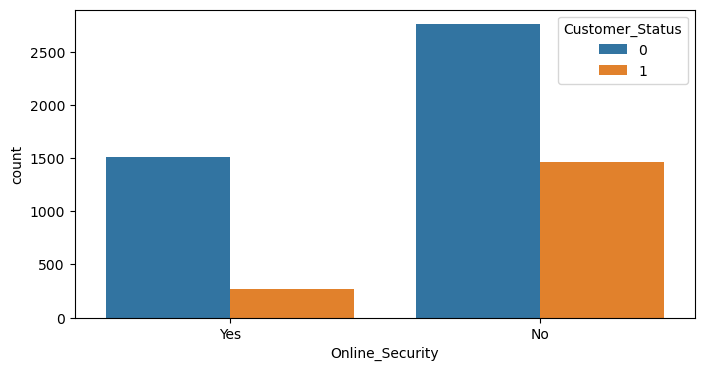

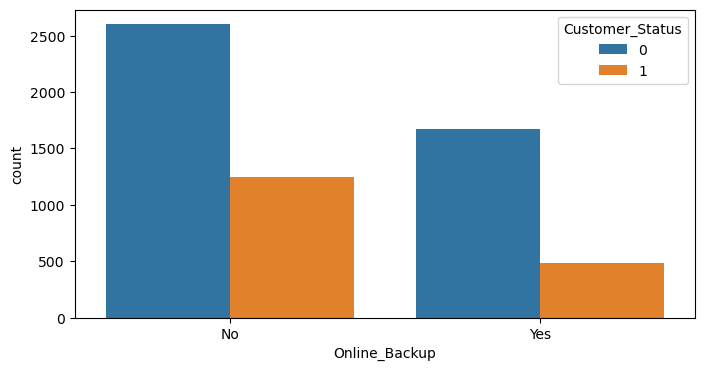

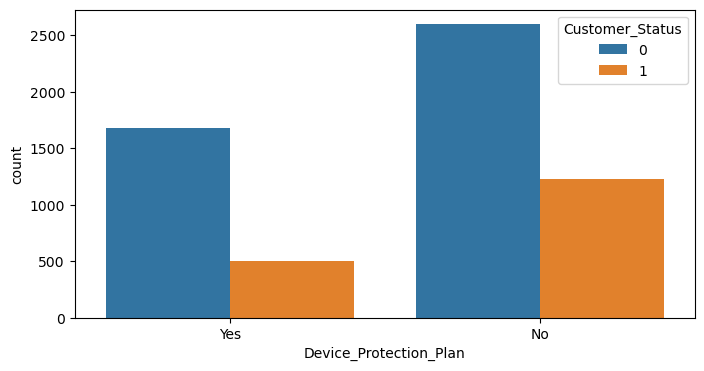

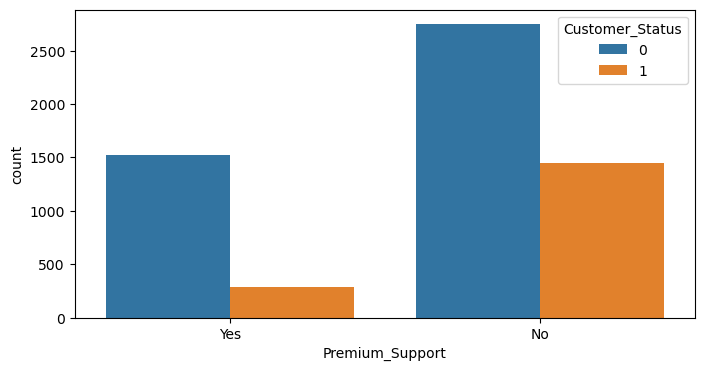

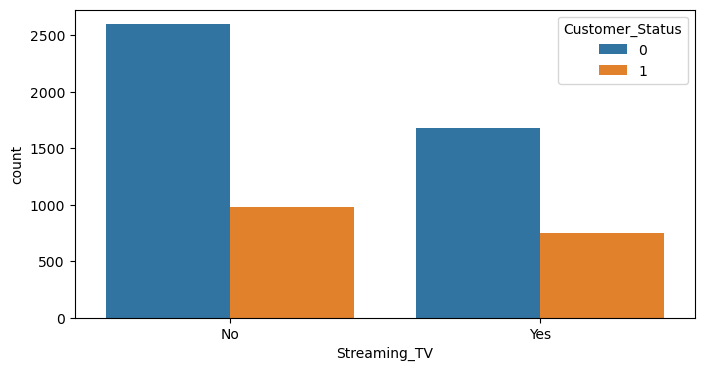

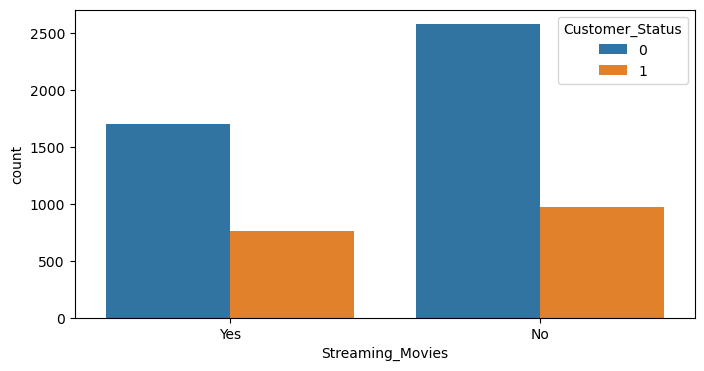

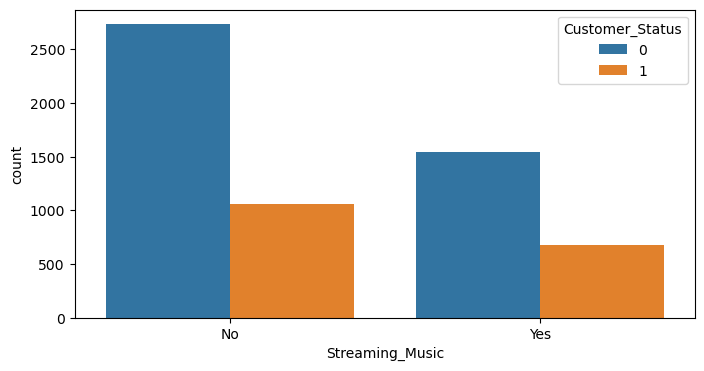

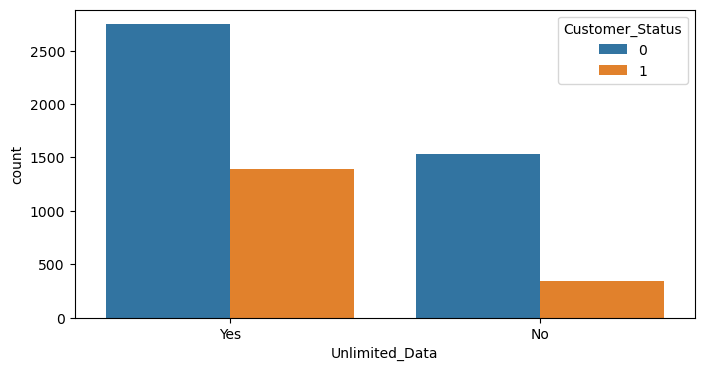

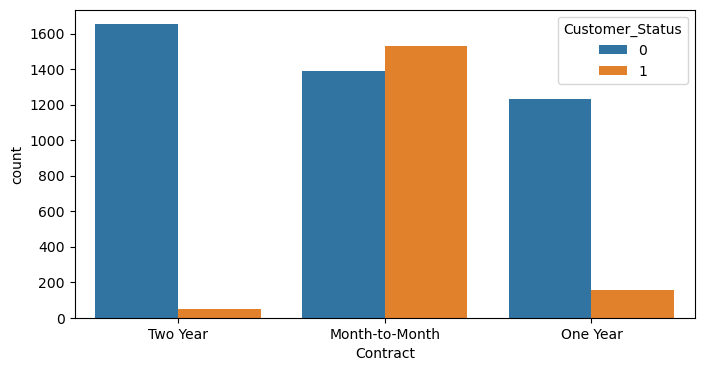

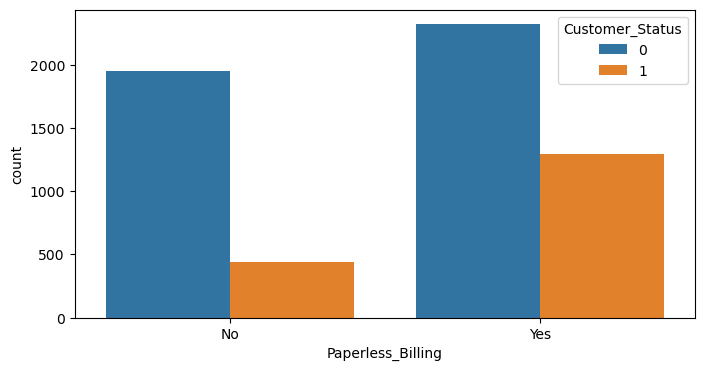

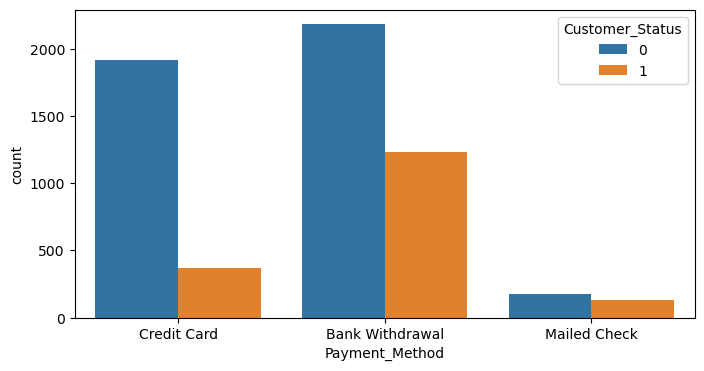

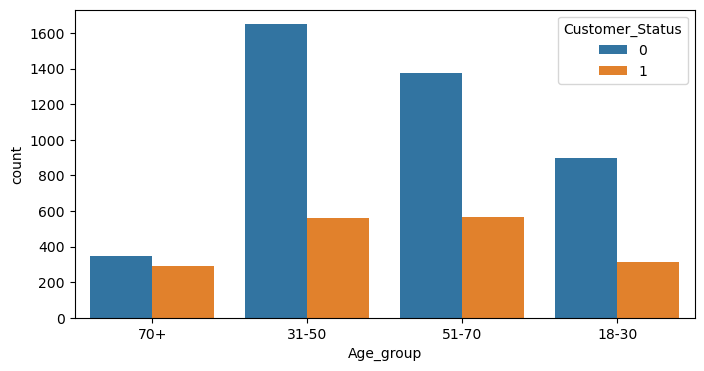

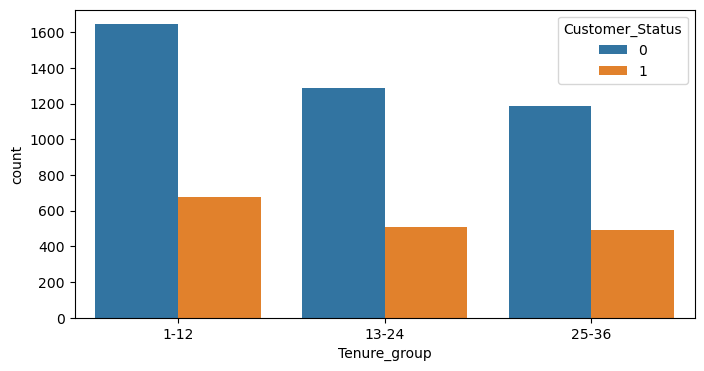

In [144]:
for i, predictor in enumerate(df1.drop(columns=['Number_of_Referrals','Monthly_Charge','Total_Charges','Total_Refunds','Total_Extra_Data_Charges','Total_Long_Distance_Charges','Total_Revenue','Customer_Status'])):
    plt.figure(i)
    plt.figure(figsize=(8,4))
    sns.countplot(data=df1,x=predictor,hue='Customer_Status')
    if predictor=='State':
        plt.xticks(rotation=90)

Gender: Female customers have slightly higher churn rates compared to males.

Married: Unmarried customers (status 0) churn at a higher rate compared to married ones.

State: Churn rates vary significantly across states, with some states showing disproportionately higher churn.

Value_Deal: "No Deal" has the highest churn, while customers with deals churn less.

Phone_Service: Customers with phone services have higher churn, although the gap is smaller.

Multiple_Lines: Customers with no multiple lines (status 0) churn less compared to those with multiple lines.

Internet_Service: Customers with internet service have significantly higher churn compared to those without it.

Internet_Type: Fiber optic users show the highest churn rates compared to DSL and cable users.

Online_Security: Customers without online security (status 0) are higher, and churn (status 1) is more frequent among them.

Online_Backup: Customers without online backup (status 0) are more likely to churn than those with backup.

Device_Protection_Plan: Customers without a device protection plan are more likely to churn.

Premium_Support: Customers with no premium support show higher churn compared to those with it.

Streaming_TV: Churn is slightly higher among customers who do not use streaming TV services.

Streaming_Music: Churn is higher among customers who do not use streaming music services.

Contract: Month-to-month contracts have the highest churn, while two-year contracts show the lowest churn.

Paperless_Billing: Churn is significantly higher among customers with paperless billing.

Payment_Method: Bank withdrawals show the highest churn, while mailed checks have minimal churn.

Age_Group: Churn is higher in the age group 31–50, followed by 51–70, with minimal churn in the younger and older age groups.

Tenure_Group: Customers with lower tenure (1–12 months) churn more, while churn reduces as tenure increases.




In [152]:
df_dummies = pd.get_dummies(df1,dtype='int')
df_dummies.head()

,Number_of_Referrals,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Gender_Female,Gender_Male,...,Payment_Method_Bank Withdrawal,Payment_Method_Credit Card,Payment_Method_Mailed Check,Age_group_18-30,Age_group_31-50,Age_group_51-70,Age_group_70+,Tenure_group_1-12,Tenure_group_13-24,Tenure_group_25-36
0,5,75.150002,3480.350098,0.0,0,422.549988,3902.899902,0,0,1,...,0,1,0,0,0,0,1,1,0,0
1,9,50.250000,2221.550049,0.0,0,292.049988,2513.600098,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,15,71.800003,1167.800049,0.0,0,734.400024,1902.199951,1,0,1,...,1,0,0,0,0,0,1,0,1,0
3,14,78.949997,378.399994,0.0,0,61.349998,439.750000,1,1,0,...,1,0,0,0,0,0,1,0,1,0
4,2,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,0,1,0,...,0,1,0,0,1,0,0,0,0,1


as machine learning dont understand categorical features 

### numerical analysis

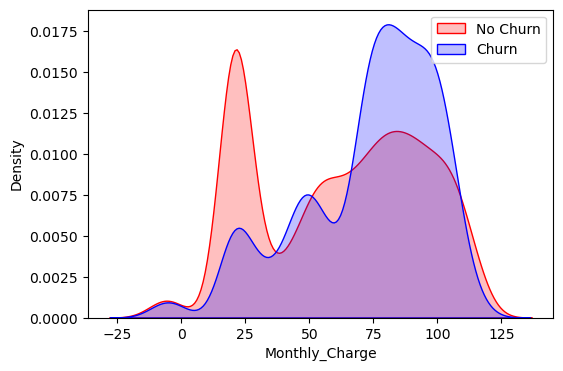

In [173]:
plt.figure(figsize=(6,4))
tot = sns.kdeplot(df_dummies.Monthly_Charge[(df_dummies['Customer_Status']==0)],color='red',fill=True)
tot = sns.kdeplot(df_dummies.Monthly_Charge[(df_dummies['Customer_Status']==1)],ax=tot,color='blue',fill=True)
tot.legend(["No Churn","Churn"],loc='upper right')

Customers with higher monthly charges tend to churn more frequently. This could indicate that higher costs are a factor in customer churn.

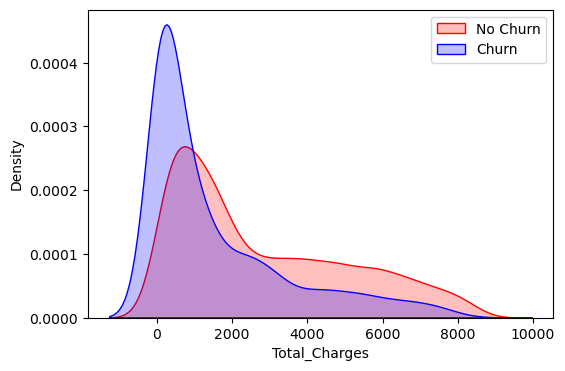

In [175]:
plt.figure(figsize=(6,4))
tot = sns.kdeplot(df_dummies.Total_Charges[(df_dummies['Customer_Status']==0)],color='red',fill=True)
tot = sns.kdeplot(df_dummies.Total_Charges[(df_dummies['Customer_Status']==1)],ax=tot,color='blue',fill=True)
tot.legend(["No Churn","Churn"],loc='upper right')

Similar to Monthly_Charge, customers with higher total charges also show a higher tendency to churn. This suggests that overall expenditure might be influencing customer retention.

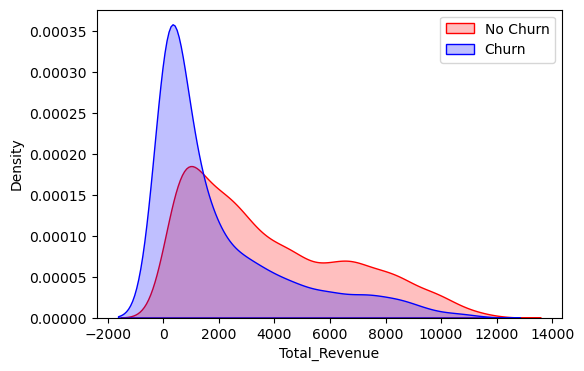

In [177]:
plt.figure(figsize=(6,4))
tot = sns.kdeplot(df_dummies.Total_Revenue[(df_dummies['Customer_Status']==0)],color='red',fill=True)
tot = sns.kdeplot(df_dummies.Total_Revenue[(df_dummies['Customer_Status']==1)],ax=tot,color='blue',fill=True)
tot.legend(["No Churn","Churn"],loc='upper right')

There is a noticeable difference in the revenue distribution between churned and non-churned customers. Higher revenue customers might be more valuable but also at a higher risk of churning.

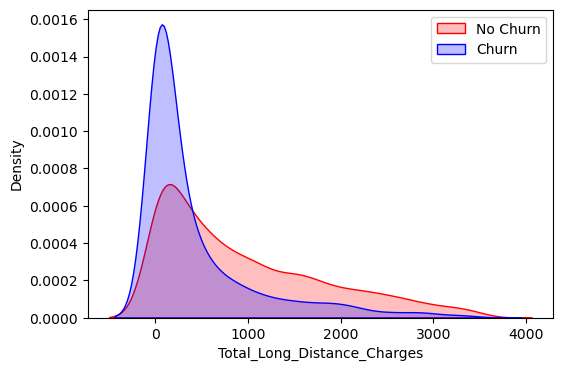

In [179]:
plt.figure(figsize=(6,4))
tot = sns.kdeplot(df_dummies.Total_Long_Distance_Charges[(df_dummies['Customer_Status']==0)],color='red',fill=True)
tot = sns.kdeplot(df_dummies.Total_Long_Distance_Charges[(df_dummies['Customer_Status']==1)],ax=tot,color='blue',fill=True)
tot.legend(["No Churn","Churn"],loc='upper right')

Customers with higher long-distance charges appear to churn more. This could be due to dissatisfaction with long-distance service costs or quality.

<Axes: >

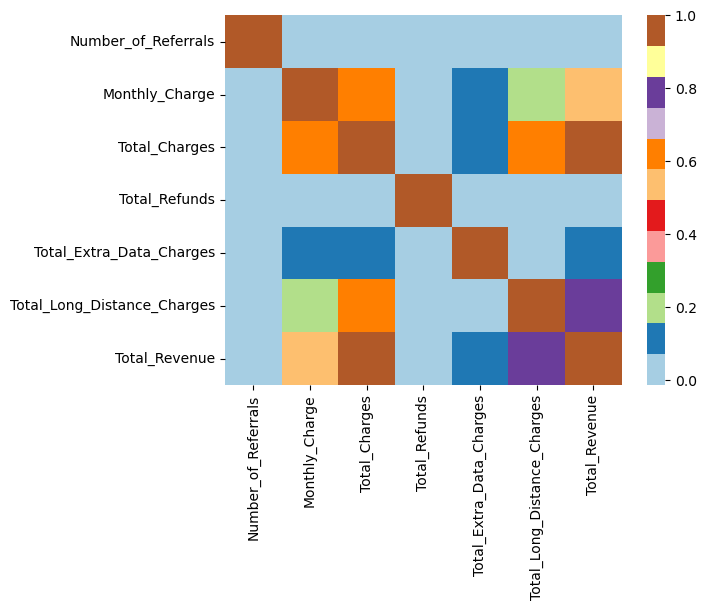

In [183]:
sns.heatmap(num_col.corr(),cmap='Paired')

<Axes: >

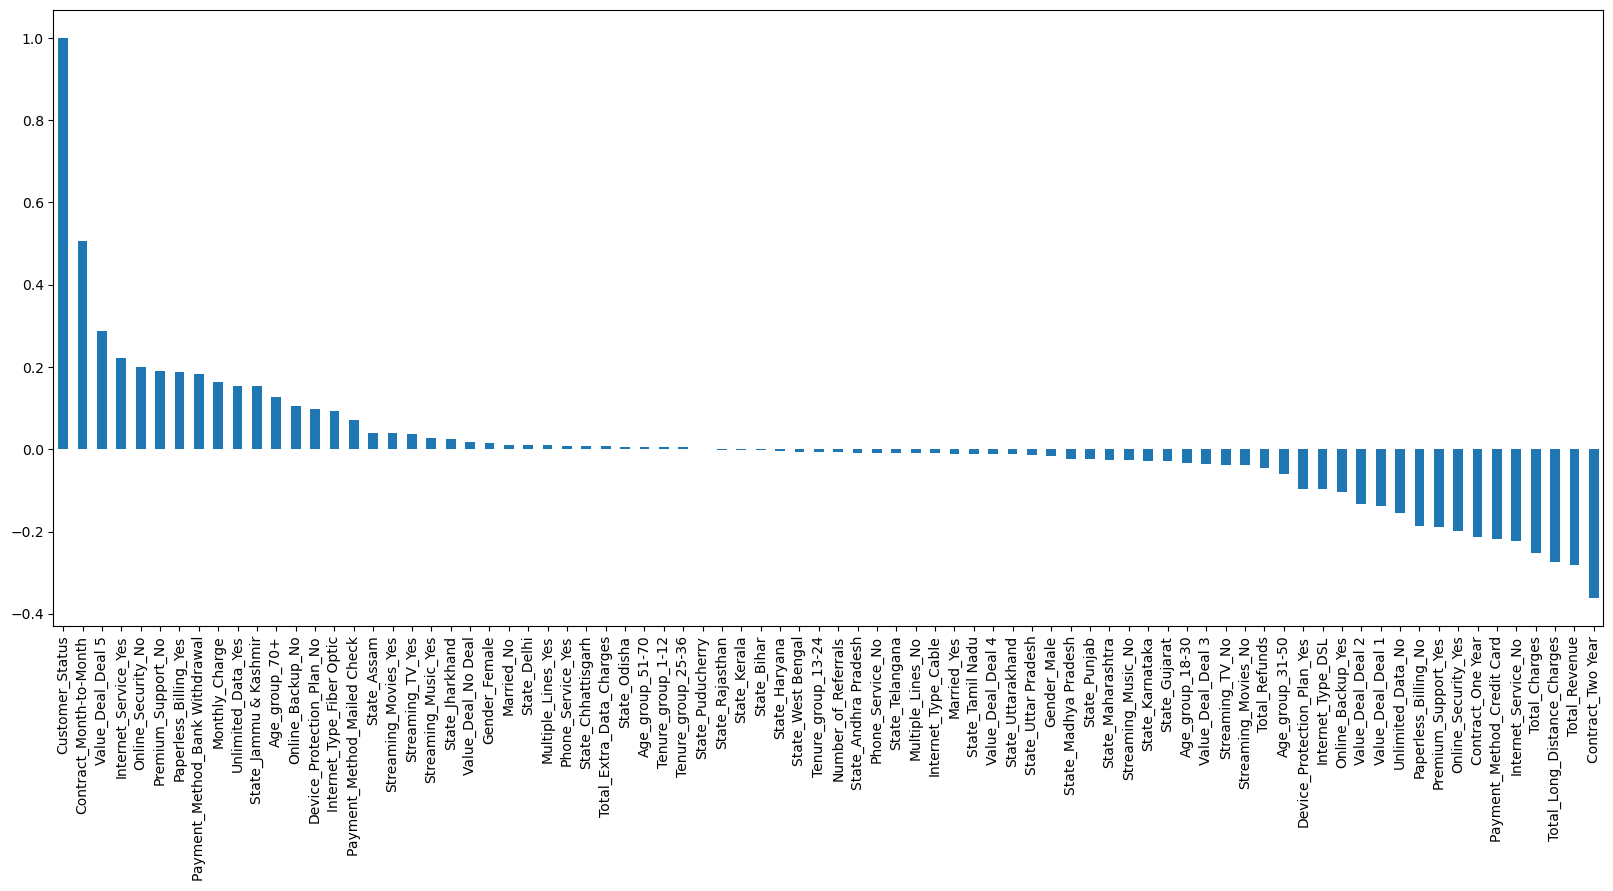

In [187]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Customer_Status'].sort_values(ascending = False).plot(kind='bar')

correlations of each feature with respect to Customer Churn : 

<Axes: >

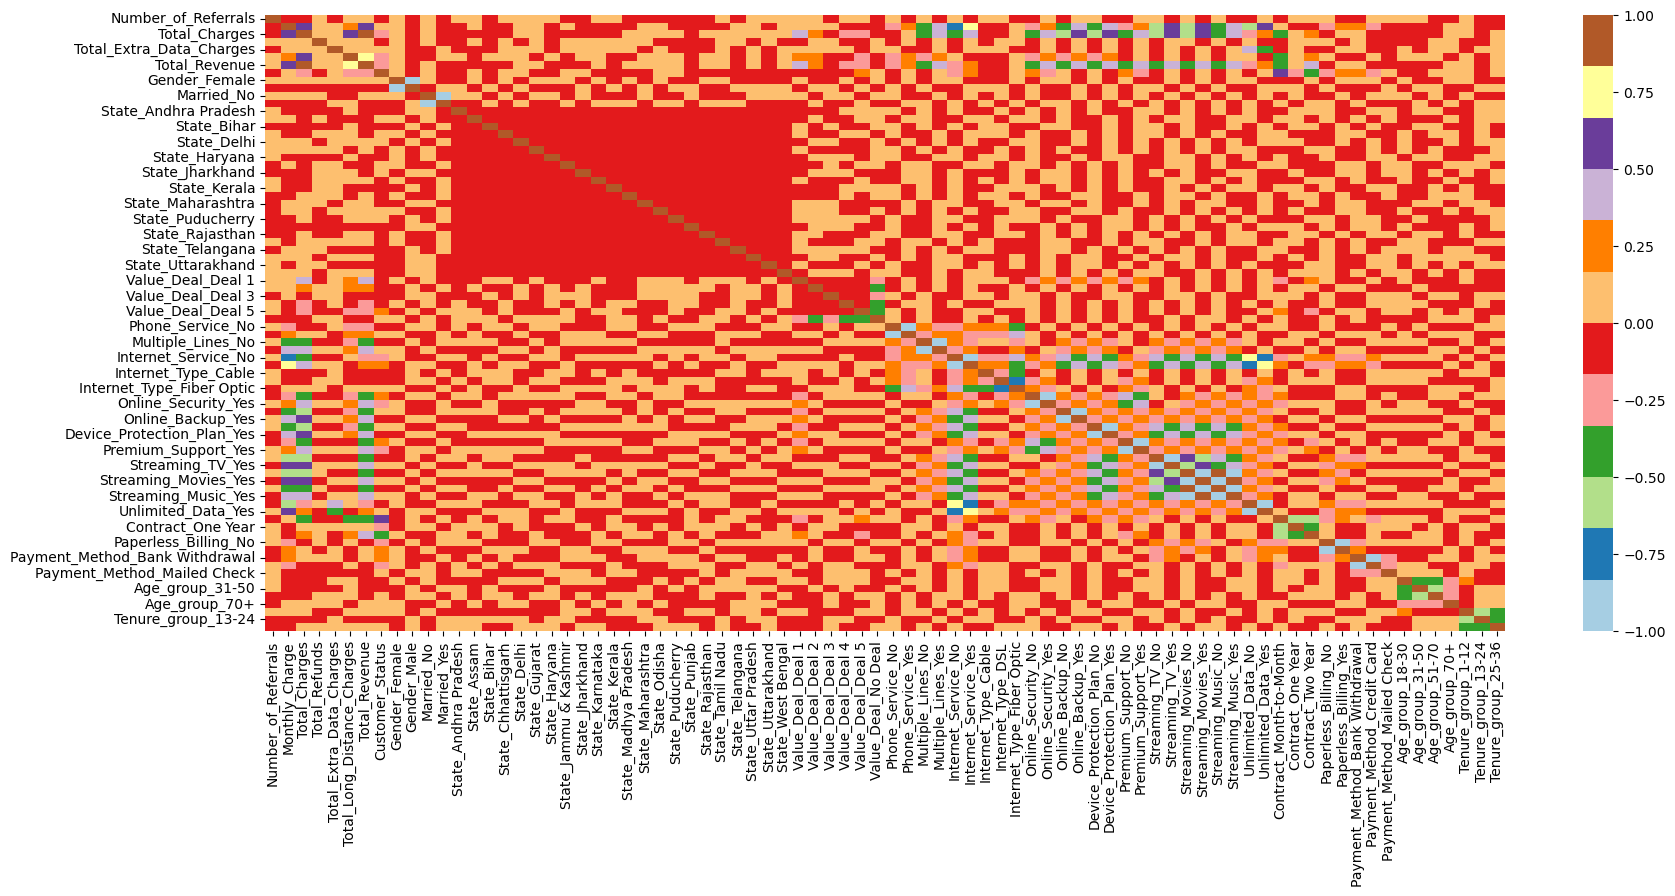

In [189]:
plt.figure(figsize=(20,8))
sns.heatmap(df_dummies.corr(),cmap='Paired')

In [ ]:
df_dummies.to_csv('training.csv', index = False)